In [10]:
import sys
import os
import numpy as np
sys.path.append("..") 
import importlib
import functions.data_class as data_class
import functions.plot as plot
importlib.reload(data_class)
importlib.reload(plot)

<module 'functions.plot' from '/mnt/c/Users/hinhi/OneDrive - HKUST Connect/MPhil/mcf_project/validation/../functions/plot.py'>

In [2]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [3]:
%%html
<style>
.output_svg div{
  width: 100% !important;
  height: 100% !important;
}
</style>

In [5]:
# Example for plot_scatter_with_hist function.
# Read data ...
projection_path = '../h5_projected'
version = 'g1040_0016_binary_search_10000_fib', 'g1041_9015_by_mass_10000_fib'

para_main_file = os.path.join(projection_path, version[0], 'main.h5')
perp_main_file = os.path.join(projection_path, version[1], 'main.h5')

para_data = data_class.main_data(para_main_file)
perp_data = data_class.main_data(perp_main_file)

para_data.calc_dgf(dense_gas=4413.0297186780,
                   total_cloud_mass=11002.1148454371,
                   contour_cloud_mass=3642.722286)
perp_data.calc_dgf(dense_gas=950.9536251046,
                   total_cloud_mass=11002.1148454371,
                   contour_cloud_mass=3642.722489)

In [15]:
np.sum(para_data['b_offset']  > 45),np.sum(para_data['b_offset']  < 45), \
    np.sum(perp_data['b_offset']  > 45), np.sum(perp_data['b_offset']  < 45)



(47, 9953, 6909, 3091)

In [6]:
# input parameters.
x1 = para_data['b_offset']
y1 = para_data['mcf_slope']
x2 = perp_data['b_offset']
y2 = perp_data['mcf_slope']
label1 = "Parallel cloud"
abbr1="Para. c."
abbr2="Perp. c."
label2 = "Perpendicular cloud"
xlabel = "Cloud-field offset [degree]"
ylabel = "MCF Slope [column density$^{-1}$]"
xlim = (0, 90)
ylim = (0, 0.005)

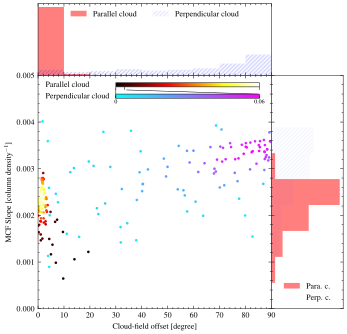

In [11]:
importlib.reload(plot) # for debug usage

plot.plot_scatter_with_hist(x1, x2, y1, y2, label1, label2, xlabel, ylabel, xlim, ylim, abbr1, abbr2)

In [12]:
x1 = para_data['b_offset']
y1 = para_data['dgf']
x2 = perp_data['b_offset']
y2 = perp_data['dgf']
label1 = "Parallel cloud"
abbr1="Para. c."
abbr2="Perp. c."
label2 = "Perpendicular cloud"
xlabel = "Cloud-field offset [degree]"
ylabel = "Dense gas fraction"
xlim = (0, 90)
ylim = (0, 0.6)

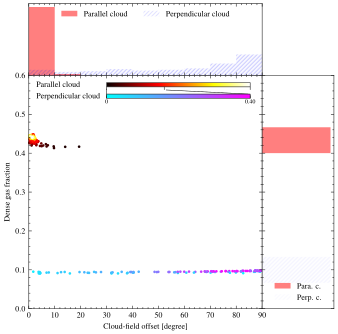

In [13]:
importlib.reload(plot) # for debug usage

plot.plot_scatter_with_hist(x1, x2, y1, y2, label1, label2, xlabel, ylabel, xlim, ylim, abbr1, abbr2)

In [23]:
"""
Calculated value for dense gas fractions is.

para_data.calc_dgf(dense_gas=4413.0297186780,
                   total_cloud_mass=11002.1148454371,
                   contour_cloud_mass=3642.722286)
perp_data.calc_dgf(dense_gas=950.9536251046,
                   total_cloud_mass=11002.1148454371,
                   contour_cloud_mass=3642.722489)                   
"""

# D0 is the DGF without the projection factor
D0_para = 4413.0297186780/11002.1148454371
D0_perp = 950.9536251046/11002.1148454371
print(f"D0 para = {D0_para:.4f}, D0 perp = {D0_perp:.4f}")


# D is the DGF with the projection factor
print(f"D para  = {y1.mean():.4f}, D perp  = {y2.mean():.4f}")

print(f"D/D0 para  = {y1.mean()/D0_para:.4f}, D/D0 perp  = {y2.mean()/D0_perp:.4f}")


D0 para = 0.4011, D0 perp = 0.0864
D para  = 0.4354, D perp  = 0.0949
D para  = 1.0854, D perp  = 1.0980


In [32]:
import numpy as np
np.sum(x2 < 45)

32